In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [2]:
investor_data = pd.read_csv('investor_data_2.csv')
investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change,fee_percent,invite_percent
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted,0.000000,0.133333
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted,0.174783,0.116667
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None,0.248980,0.144444


In [3]:
investor_data = investor_data.drop(['invite_tier', 'fee_share', 'invite'], axis=1)
investor_data.shape

(7233, 11)

In [4]:
investor_data = pd.get_dummies(investor_data)
investor_data.shape

(7233, 21)

In [5]:
investor_data.head()

,deal_size,rating,covenants,total_fees,fee_percent,invite_percent,investor_Bank of America,investor_Deutsche Bank,investor_Goldman Sachs,investor_MUFG Union,...,commit_Commit,commit_Decline,int_rate_Above,int_rate_Below,int_rate_Market,prior_tier_Bookrunner,prior_tier_Participant,tier_change_Demoted,tier_change_None,tier_change_Promoted
0,300,2,2,30,0.000000,0.133333,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,1200,2,2,115,0.174783,0.116667,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
2,900,3,2,98,0.248980,0.144444,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,1200,2,2,165,0.343030,0.175000,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4,900,3,3,161,0.239130,0.100000,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0


In [6]:
investor_data = investor_data.drop('commit_Commit', axis=1)
investor_data.shape

(7233, 20)

In [8]:
target = investor_data.commit_Decline
inputs = investor_data.drop('commit_Decline', axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

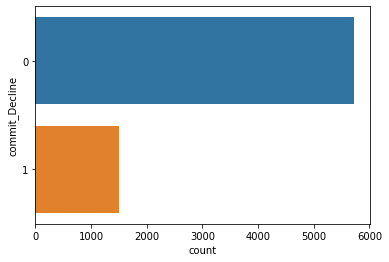

In [9]:
sns.countplot(y = 'commit_Decline', data=investor_data)
plt.show

In [10]:
from sklearn.model_selection import train_test_split
split_list = train_test_split(inputs, target, test_size=0.2, random_state = 1, stratify=investor_data.commit_Decline)

In [12]:
input_train, input_test, target_train, target_test = split_list
for item in [input_train, input_test, target_train, target_test]:
    print (item.shape)

(5786, 19)
(1447, 19)
(5786,)
(1447,)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=1, solver='liblinear')),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=1)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
}

In [20]:
for key, value in pipelines.items():
    print(key, type(value))

l1 <class 'sklearn.pipeline.Pipeline'>
l2 <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [23]:
l1_hyperparameters = {
    "logisticregression__C" : [0.1, 1, 10],
}
l2_hyperparameters = {
    "logisticregression__C" : [0.1, 1, 10],
}
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 0.3, 0.6]
}
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate':[0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}



hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In [24]:
for key in ['l1', 'l2', 'rf', 'gb']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key, 'was found, and it is a grid.')
        else:
            print(key, 'was found, but it is not a grid.')
    else:
        print(key, 'was not found.')
            

l1 was found, and it is a grid.
l2 was found, and it is a grid.
rf was found, and it is a grid.
gb was found, and it is a grid.


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
models = {}
for key in pipelines.keys():
    models[key] = GridSearchCV(pipelines[key], hyperparameters[key], cv=5)
    

In [27]:
for key in models:
    models[key].fit(input_train, target_train)
    print(key, 'is trained and tuned')

l1 is trained and tuned


/Users/connorkillion/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/connorkillion/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/connorkillion/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/connorkillion/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/connorkillion/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

l2 is trained and tuned
rf is trained and tuned
gb is trained and tuned


In [28]:
from sklearn.metrics import confusion_matrix

pred = models['l1'].predict(input_test)
print(confusion_matrix(target_test, pred))

[[1124   22]
 [  23  278]]


In [31]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve, unpack outputs, and print
for key in models.keys():
    pred = models[key].predict(input_test)
    fpr, tpr, thresholds = roc_curve(target_test, pred)
    print(key)
    print('AUROC =', round(auc(fpr, tpr), 4))
    

l1
AUROC = 0.9522
l2
AUROC = 0.9518
rf
AUROC = 0.9616
gb
AUROC = 0.9645
